In [2]:
# Importation des librairies


import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 
import statsmodels as stat
from statsmodels.tsa.api import Holt
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [3]:
data = pd.read_csv("data_cleaned_P4.csv")

In [4]:
data.head()

,Unnamed: 0,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,...,Wholesale Club/Supercenter,Bar/Nightclub,Convenience Store without Gas Station,Enclosed Mall,Food Sales,Swimming Pool,Vocational School,unknown,Fast Food Restaurant,Other - Technology/Science
0,0,Nonresidential COS,Other,DOWNTOWN,47.61623,-122.33657,1.0,2,97288,Police Station,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,NonResidential,Other,DOWNTOWN,47.61327,-122.33136,1.0,8,102761,Other - Entertainment/Public Assembly,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,Nonresidential COS,Other,DOWNTOWN,47.60649,-122.33297,1.0,11,412000,Library,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,NonResidential,Other,DOWNTOWN,47.60546,-122.33279,1.0,6,103911,Fitness Center/Health Club/Gym,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,NonResidential,Mixed Use Property,DOWNTOWN,47.60515,-122.33159,1.0,5,57452,Social/Meeting Hall,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data = data.drop(['Unnamed: 0'], axis=1)

**Étude de la proportion des différentes sources d'énergie**

In [6]:
data["SteamUse(kBtu)"].mean()

506495.3936636472

In [7]:
data["Electricity(kBtu)"].mean()

5489342.644293435

In [8]:
data["NaturalGas(kBtu)"].mean()

1703473.1638033157

En général, la consommation moyenne d'électricité est supérieure à la consommation moyenne de vapeur et de gaz (pour tous les bâtiments)

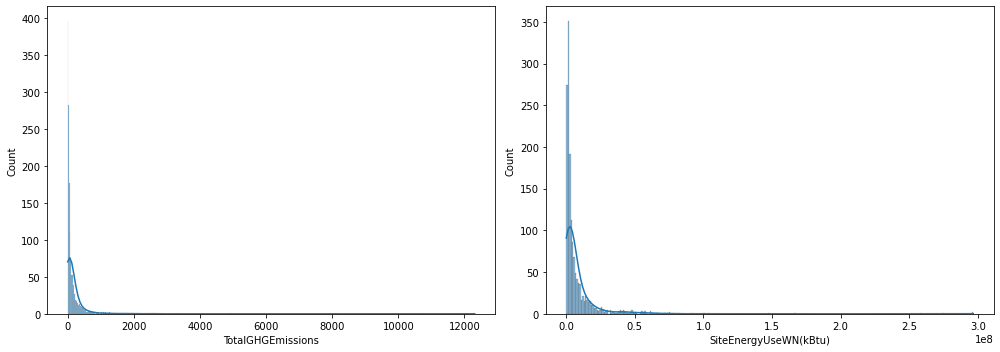

In [9]:
# Distributions des 2 variables a predire 
f, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data=data, x="TotalGHGEmissions", kde=True, palette='bright', ax=axs[0])
sns.histplot(data=data, x="SiteEnergyUseWN(kBtu)", kde=True, palette='bright', ax=axs[1])
f.tight_layout()

In [10]:
for col in data.columns :
    print(col)

BuildingType
PrimaryPropertyType
Neighborhood
Latitude
Longitude
NumberofBuildings
NumberofFloors
PropertyGFATotal
LargestPropertyUseType
LargestPropertyUseTypeGFA
SecondLargestPropertyUseType
SecondLargestPropertyUseTypeGFA
ThirdLargestPropertyUseType
ThirdLargestPropertyUseTypeGFA
ENERGYSTARScore
SiteEUI(kBtu/sf)
SiteEUIWN(kBtu/sf)
SourceEUI(kBtu/sf)
SiteEnergyUse(kBtu)
SiteEnergyUseWN(kBtu)
SteamUse(kBtu)
Electricity(kBtu)
NaturalGas(kBtu)
TotalGHGEmissions
GHGEmissionsIntensity
building_age
NonResidential
Nonresidential COS
Nonresidential WA
contain_parking
parking_area_rate
Office_largest_area_rate
Non_Refrigerated_Warehouse_largest_area_rate
Retail_Store_area_rate
Other_largest_area_rate
Hotel_largest_area_rate
Worship_Facility_largest_area_rate
Distribution_Center_largest_area_rate
Medical_Office_largest_area_rate
Supermarket_largest_area_rate
K_12_School_largest_area_rate
Recreation_largest_area_rate
Office_second_largest_area_rate
Retail_Store_second_largest_area_rate
Other_se

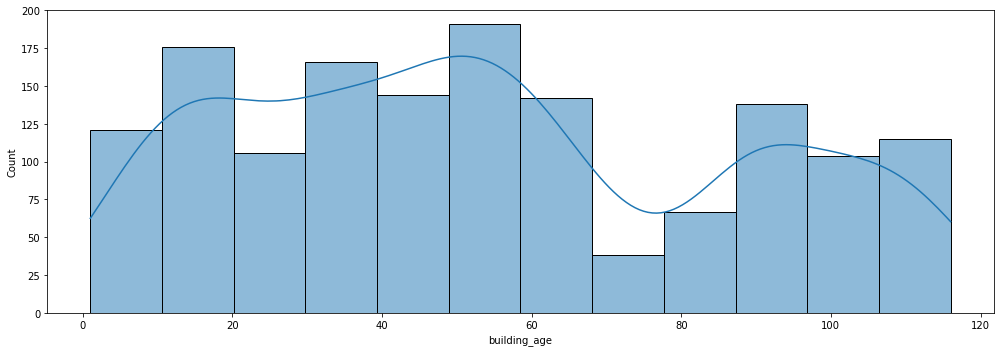

In [11]:
# Distributions des 2 variables a predire 
f, axs = plt.subplots(figsize=(14, 5))
sns.histplot(data=data, x="building_age", kde=True, palette='bright')
f.tight_layout()

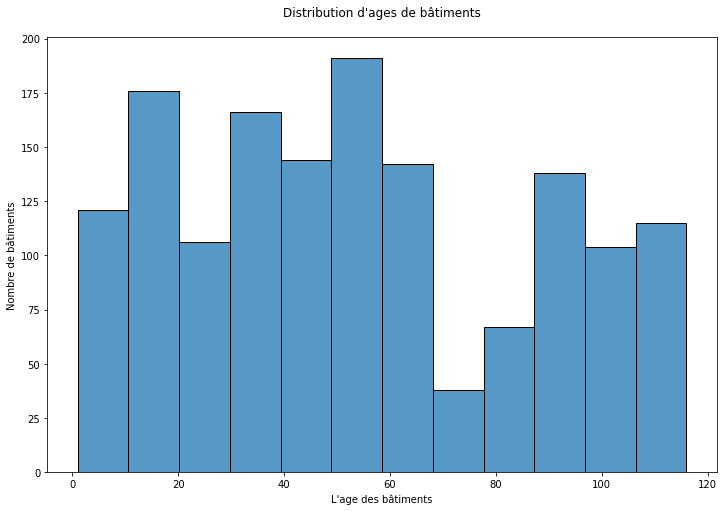

In [13]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data, x='building_age')
ax.set_xlabel("L'age des bâtiments")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution d'ages de bâtiments\n")
plt.show()

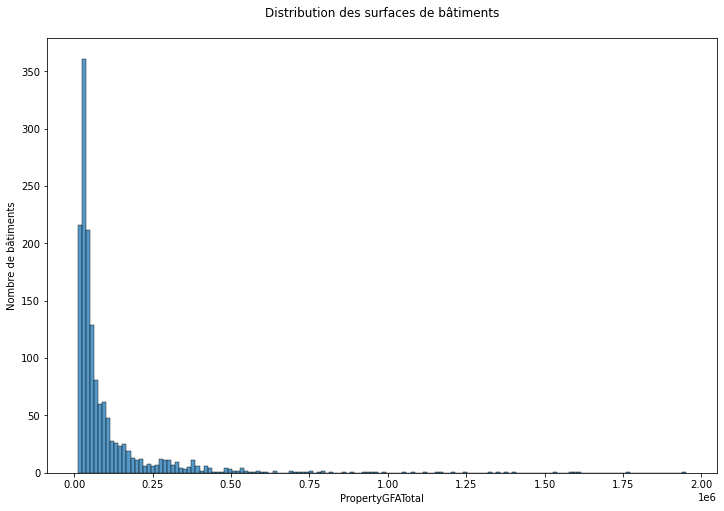

In [15]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data, x='PropertyGFATotal')
ax.set_xlabel("PropertyGFATotal")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des surfaces de bâtiments\n")
plt.show()

In [16]:
#This function allows you to view the distribution 
#of CO2 emissions within the classes of a variable.
def visualisation(variable,df):
    # the_mean=df["GHGEmissions(MetricTonsCO2e)"].mean()
    the_mean=df["TotalGHGEmissions"].mean()
    fig=plt.figure(figsize=[18,7])
    fig.patch.set_facecolor('#E0E0E0')
    fig.patch.set_alpha(0.7)
    plt.title("C02 emissions distribution by {}".format(variable),size=16)
    sns.boxplot(x=variable, y="TotalGHGEmissions", data=df,color="#cbd1db",width=0.5,showfliers=False,showmeans=True)
    plt.hlines(y=the_mean,xmin=-0.5,xmax=len(df[variable].unique())-0.5,color="#6d788b",ls="--",label="Global mean")

    plt.ylabel(" C02 emissions",size=14)
    plt.xticks(range(0,len(df[variable].unique()))
               ,df[variable].unique(),rotation=90)
    plt.legend()
    plt.grid()
    plt.show()

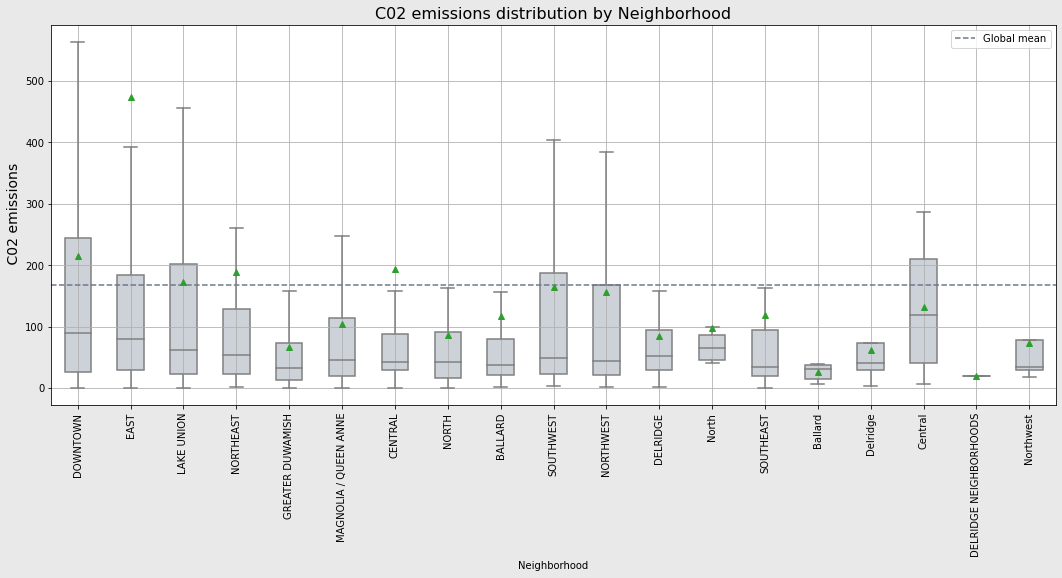

In [17]:
visualisation('Neighborhood',data)

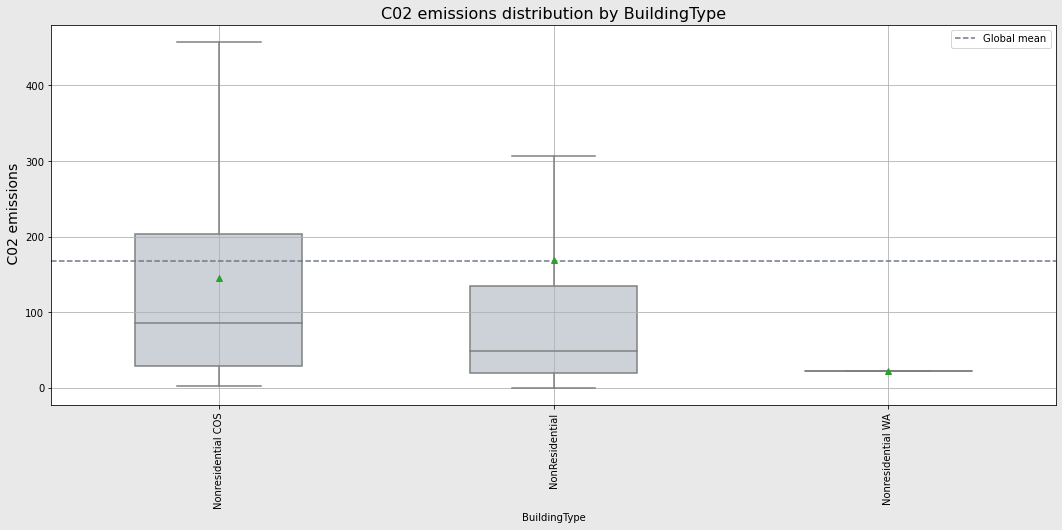

In [18]:
visualisation('BuildingType',data)

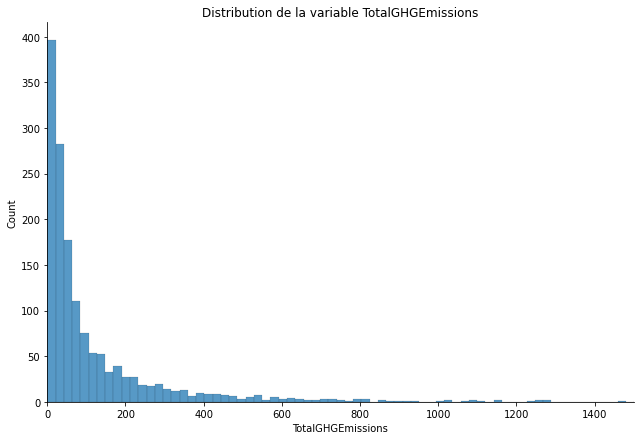

In [19]:
anaghg=sns.displot(data['TotalGHGEmissions'], palette='bright', height=6, aspect=1.5)
plt.xlim(0,1500)
anaghg.set(title="Distribution de la variable TotalGHGEmissions")

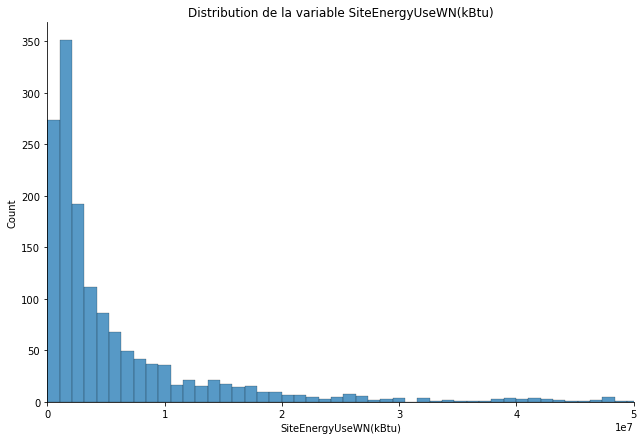

In [20]:
anaseu=sns.displot(data['SiteEnergyUseWN(kBtu)'], palette='bright', height=6, aspect=1.5)
plt.xlim(0,0.5e8)
anaseu.set(title="Distribution de la variable SiteEnergyUseWN(kBtu)")

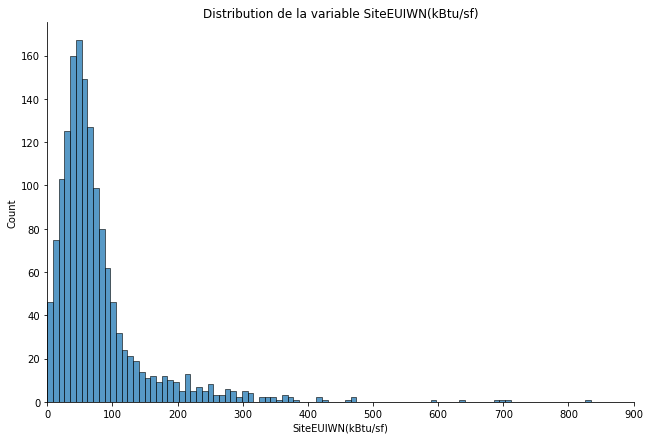

In [29]:
anaseu=sns.displot(data['SiteEUIWN(kBtu/sf)'], palette='bright', height=6, aspect=1.5)
plt.xlim(0,900)
anaseu.set(title="Distribution de la variable SiteEUIWN(kBtu/sf)")

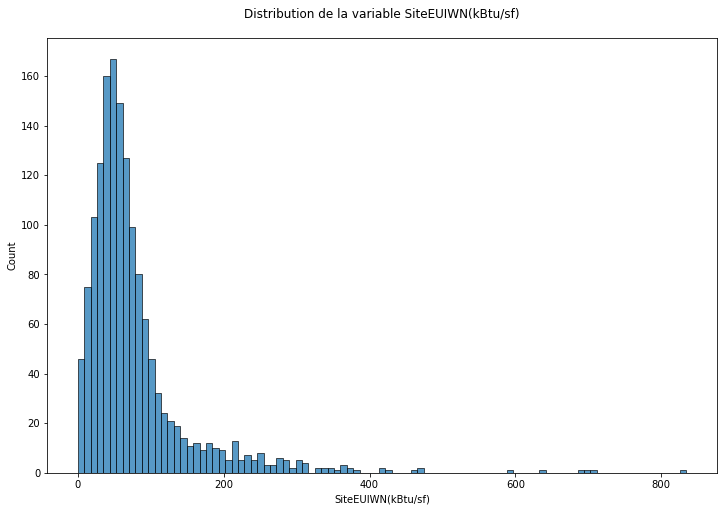

In [26]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data, x='SiteEUIWN(kBtu/sf)')
ax.set_xlabel("SiteEUIWN(kBtu/sf)")
ax.set_ylabel("Count")
plt.title(f"Distribution de la variable SiteEUIWN(kBtu/sf)\n")
plt.show()

In [35]:

pip install folium

Note: you may need to restart the kernel to use updated packages.


In [38]:
import folium
map_osm = folium.Map()
map_osm = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()],zoom_start=11)
for i in range(0,len(data)):
    folium.Circle([data.iloc[i]['Latitude'],data.iloc[i]['Longitude']], 
                       radius =100).add_to(map_osm)
map_osm